In [1]:
#Setup
!pip install pandas nltk matplotlib seaborn wordcloud

import pandas as pd
import numpy as np
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import json

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:

#Load dataset
from google.colab import files
import json
import pandas as pd

print(" To select the fashion_products_dataset.json file ")
uploaded = files.upload()  # Opens a file-picker dialog in Colab

# Get the uploaded file name
file_name = list(uploaded.keys())[0]
print(f"\nUploaded file: {file_name}")

# Load the JSON data into a pandas DataFrame
with open(file_name, 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)
print(f"Dataset loaded. Shape: {df.shape}")
df.head()


 To select the fashion_products_dataset.json file 


Saving fashion_products_dataset.json to fashion_products_dataset.json

Uploaded file: fashion_products_dataset.json
Dataset loaded. Shape: (28080, 17)


,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,1612987911000,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,1612987912000,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,1612987912000,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,1612987913000,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,1612987913000,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Women Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [3]:

#Text Preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_title'] = df['title'].apply(clean_text)
df['clean_description'] = df['description'].apply(clean_text)

print("The text preprocessing is done")


The text preprocessing is done


In [4]:

#Basic Dataset Overview
print(df.info())
print("\nExample product:\n", df.iloc[0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   _id                28080 non-null  object
 1   actual_price       28080 non-null  object
 2   average_rating     28080 non-null  object
 3   brand              28080 non-null  object
 4   category           28080 non-null  object
 5   crawled_at         28080 non-null  int64 
 6   description        28080 non-null  object
 7   discount           28080 non-null  object
 8   images             28080 non-null  object
 9   out_of_stock       28080 non-null  bool  
 10  pid                28080 non-null  object
 11  product_details    28080 non-null  object
 12  seller             28080 non-null  object
 13  selling_price      28080 non-null  object
 14  sub_category       28080 non-null  object
 15  title              28080 non-null  object
 16  url                28080 non-null  objec

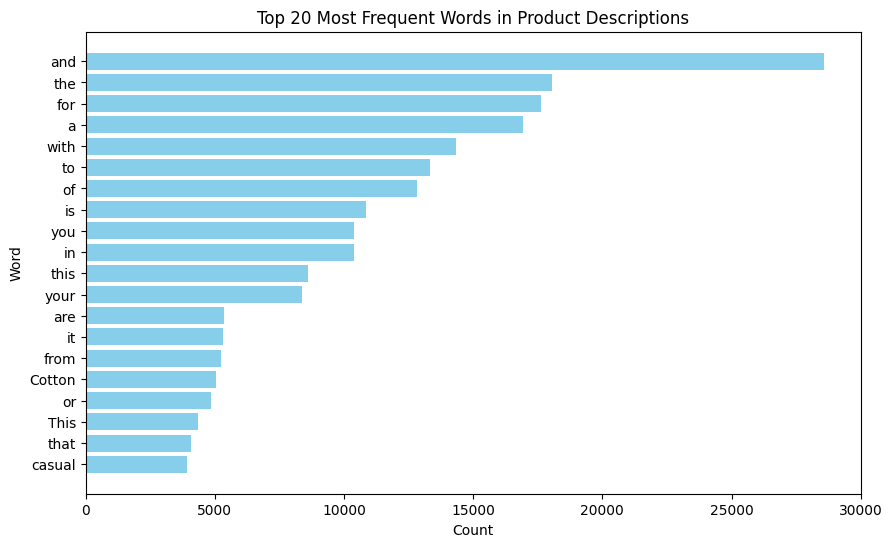

Average sentence length in product descriptions: 7.82 words per sentence
Vocabulary size: 13,071 unique words


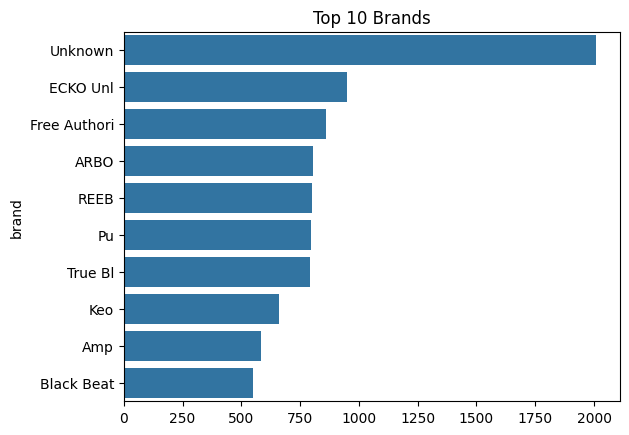

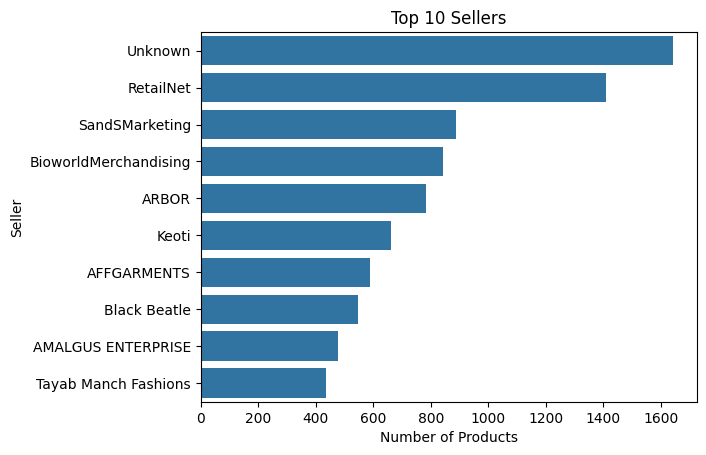

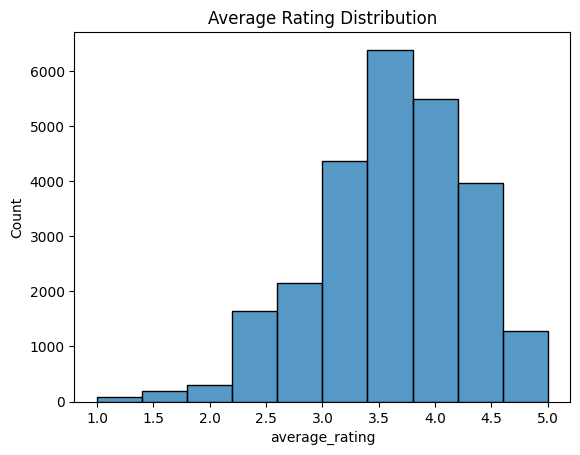

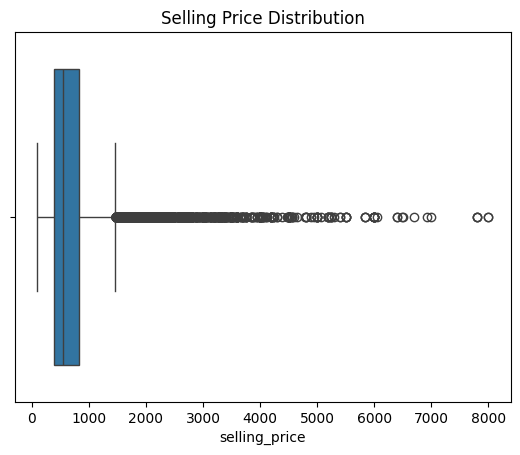

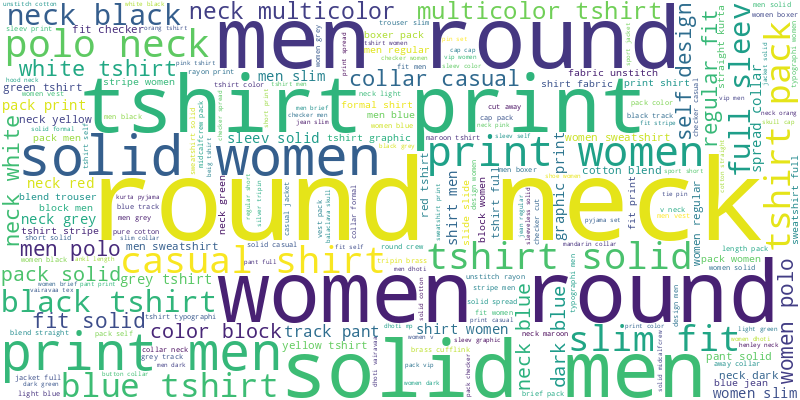

In [14]:

#Exploratory Data Analysis (EDA)

from collections import Counter

# Word counting distribution
all_text = ' '.join(df['description'].dropna().astype(str).tolist())
words = all_text.split()
word_counts = Counter(words)
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)
plt.figure(figsize=(10,6))
plt.barh(words[::-1], counts[::-1], color='skyblue')
plt.title('Top 20 Most Frequent Words in Product Descriptions')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Average sentence length
df['sentence_count'] = df['description'].apply(lambda x: len(str(x).split('.')))
df['avg_sentence_length'] = df['word_count'] / df['sentence_count'].replace(0, 1)
avg_len = df['avg_sentence_length'].mean()
print(f"Average sentence length in product descriptions: {avg_len:.2f} words per sentence")

# Vocabulary size
all_words = ' '.join(df['description'].astype(str)).split()
vocab_size = len(set(all_words))
print(f"Vocabulary size: {vocab_size:,} unique words")

# Top brands
df['brand'] = df['brand'].fillna('Unknown')     # for NaN values
df['brand'] = df['brand'].replace('', 'Unknown')  # to replace empty strings
top_brands = df['brand'].value_counts().head(10)
sns.barplot(y=top_brands.index, x=top_brands.values)
plt.title("Top 10 Brands")
plt.show()

#Top 10 Sellers
#Handling the missing or empty seller names
df['seller'] = df['seller'].fillna('Unknown')
df['seller'] = df['seller'].replace('', 'Unknown')

#Count top 10 sellers
top_sellers = df['seller'].value_counts().head(10)

# Plot
sns.barplot(y=top_sellers.index, x=top_sellers.values)
plt.title("Top 10 Sellers")
plt.xlabel("Number of Products")
plt.ylabel("Seller")
plt.show()


#Rating distribution
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
sns.histplot(df['average_rating'], bins=10)
plt.title("Average Rating Distribution")
plt.show()

#Price and discount analysis
#Converting selling_price safely to numeric
df['selling_price'] = (
    df['selling_price']
    .astype(str)                      # ensure string
    .str.replace(',', '', regex=False)  # remove commas
    .str.extract(r'(\d+\.?\d*)')[0] # extract numeric part
)

df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')  #for converting to float, NaN if fails

sns.boxplot(x=df['selling_price'])
plt.title("Selling Price Distribution")
plt.show()

# Word cloud for titles
all_titles = " ".join(df['clean_title'])
WordCloud(width=800, height=400, background_color='white').generate(all_titles).to_image()



In [15]:
#Put all product details into plain text
df['product_details_text'] = df['product_details'].apply(
    lambda details: " ".join([f"{list(d.values())[0]}" for d in details]) if isinstance(details, list) else ""
)

#Combining categorical fields
df['combined_info'] = (
    df['category'].astype(str) + " " +
    df['sub_category'].astype(str) + " " +
    df['brand'].astype(str) + " " +
    df['seller'].astype(str) + " " +
    df['product_details_text']
)



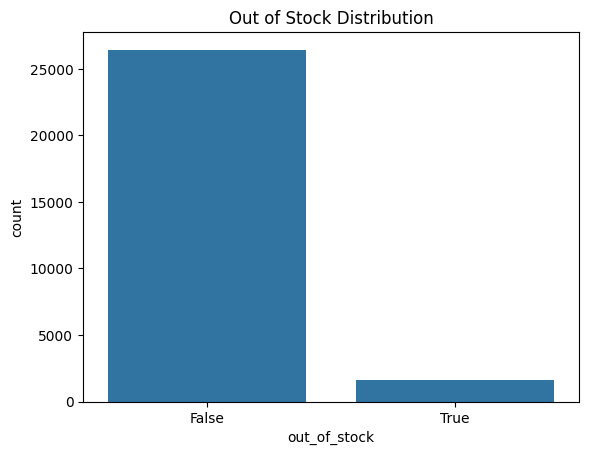

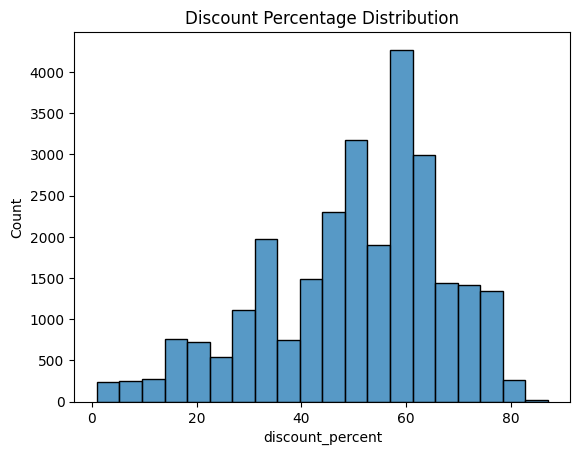

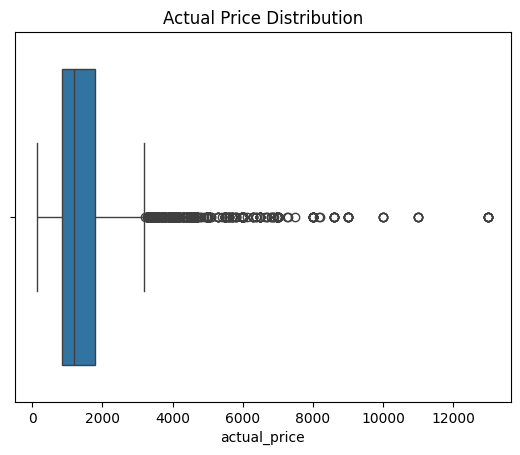

In [16]:
# Out of stock distribution
sns.countplot(x=df['out_of_stock'])
plt.title("Out of Stock Distribution")
plt.show()

# Convert discount to numeric percentage
df['discount_percent'] = df['discount'].str.extract(r'(\d+)').astype(float)

# Discount distribution
sns.histplot(df['discount_percent'], bins=20)
plt.title("Discount Percentage Distribution")
plt.show()

# Price before discount
df['actual_price'] = (
    df['actual_price']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.extract(r'(\d+\.?\d*)')[0]
)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

sns.boxplot(x=df['actual_price'])
plt.title("Actual Price Distribution")
plt.show()


In [17]:
# Vocabulary size, the unique words across all titles and the descriptions
all_words = " ".join(df['clean_title']) + " " + " ".join(df['clean_description'])
vocab = set(all_words.split())
print("Vocabulary size:", len(vocab))

#Average number of words per title and description
df['title_length'] = df['clean_title'].apply(lambda x: len(x.split()))
df['desc_length'] = df['clean_description'].apply(lambda x: len(x.split()))

print("Average title length:", df['title_length'].mean())
print("Average description length:", df['desc_length'].mean())


Vocabulary size: 6188
Average title length: 6.2258190883190885
Average description length: 18.528739316239317


In [18]:
# Top 5 highest rated products
top_rated = df.sort_values(by='average_rating', ascending=False).head(5)
print("Top 5 highest rated products:")
display(top_rated[['pid', 'title', 'average_rating', 'selling_price']])

# Top 5 products with highest discount
df['discount_value'] = (
    df['discount']
    .astype(str)
    .str.replace('% off', '', regex=False)
    .str.strip()
)
df['discount_value'] = pd.to_numeric(df['discount_value'], errors='coerce')
top_discount = df.sort_values(by='discount_value', ascending=False).head(5)
print("Top 5 products with highest discount:")
display(top_discount[['pid', 'title', 'discount_value', 'selling_price']])

# Top 5 most expensive products
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
top_expensive = df.sort_values(by='selling_price', ascending=False).head(5)
print("Top 5 most expensive products:")
display(top_expensive[['pid', 'title', 'selling_price', 'average_rating']])


Top 5 highest rated products:


,pid,title,average_rating,selling_price
27767,TSHFFEYSD558XVRZ,Solid Women Round Neck Blue T-Shirt,5.0,385.0
12332,TSHFHFTVBWCGWZFF,Printed Women Hooded Neck Black T-Shirt,5.0,549.0
12279,TSHFHFTVBFQHQGC9,Printed Women Hooded Neck Grey T-Shirt,5.0,909.0
23852,TSHF5PT8KQARH2N3,Graphic Print Men Round Neck Blue T-Shirt,5.0,519.0
12235,TSHFCWYJ2ZXU6GMN,"Solid Women Round Neck White, Black T-Shirt",5.0,649.0


Top 5 products with highest discount:


,pid,title,discount_value,selling_price
906,TSHF5FRXKGF6A4FH,Printed Women Round Neck White T-Shirt,87.0,128.0
902,TSHFMFXGFJ7G2ABK,Printed Women Round Neck Grey T-Shirt,86.0,136.0
903,TSHFMFT7VASAHBH3,Printed Women Round Neck White T-Shirt,86.0,136.0
18249,TSHFGH6T3CVGDXS9,Printed Men Round Neck Multicolor T-Shirt (Pa...,85.0,449.0
9813,CAPE9YWMURE4FKAJ,Solid Balclava Cap,84.0,228.0


Top 5 most expensive products:


,pid,title,selling_price,average_rating
2067,TKTFZ3YGGMMNBYEZ,Solid Women Track Suit,7999.0,2.7
11010,BZRFVAX2QGTEGHRH,Checkered Single Breasted Party Women Full Sle...,7998.0,2.6
25815,JCKFQF5KMJJ349H8,Full Sleeve Solid Women Casual Jacket,7799.0,3.7
26089,SWSFUMFGQFKVZGYH,Full Sleeve Printed Men Sweatshirt,7799.0,4.5
6895,JEAF8S4GWU5YKQTF,Skinny Men Blue Jeans,7794.0,4.2


In [19]:
# Save preprocessed dataset
df.to_csv("fashion_products_clean.csv", index=False)
print("The preprocessed dataset is saved")


The preprocessed dataset is saved
